##### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [4]:
VERSION = '1.2.0.0.0' # spread.shifting.hedging.position.liquidity
PATH = f'{VERSION}/'
os.mkdir(PATH)

### Visualisations

##### P&L against liquidity

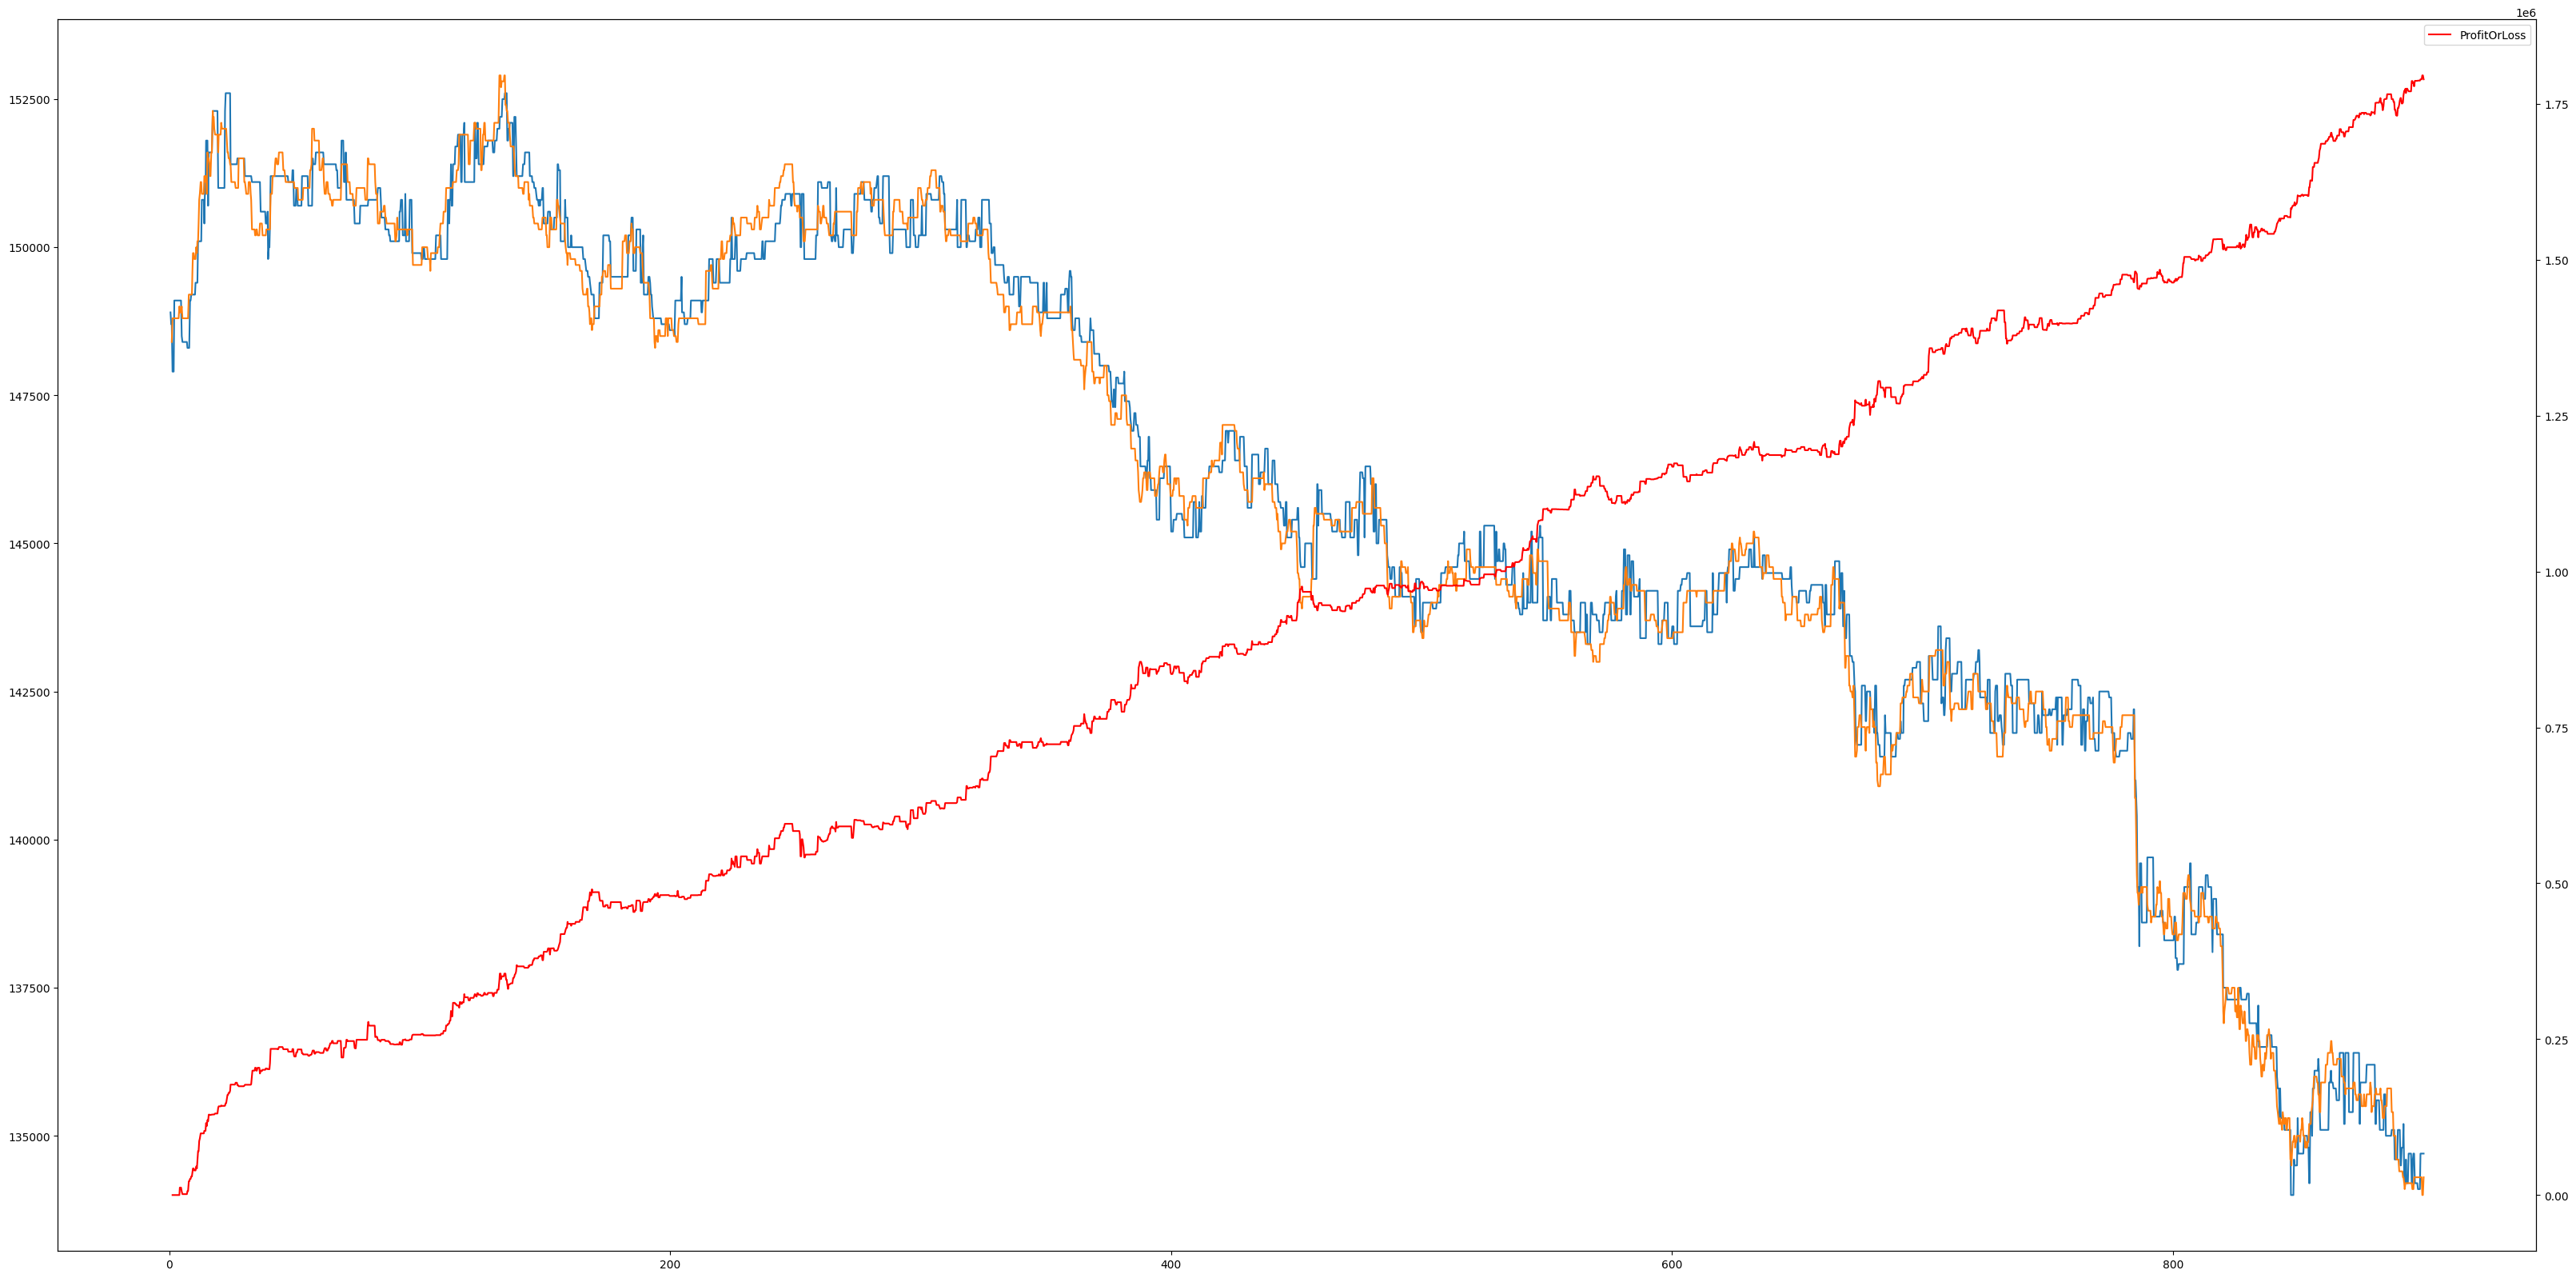

In [18]:
df = pd.read_csv('../score_board.csv')
df.head()
plt.plot(df['Time'], df['EtfPrice'], label='EtfPrice')
plt.plot(df['Time'], df['FuturePrice'], label='FuturePrice')

df1 = df[df['Team'] == 'Emineminem']
df2 = df[df['Team'] == 'AdvancedL']
ax2 = plt.twinx()
ax2.plot(df1[5:]['Time'], df1['ProfitOrLoss'][5:], label='ProfitOrLoss', color='red')
# ax2.plot(df2['Time'], df2['ProfitOrLoss'], label='ProfitOrLoss', color='black')
# ax2.plot(df1['Time'], df[df['Team']=='SimpleL']['ProfitOrLoss'], label='ProfitOrLoss', color='green')
# ax2.plot(df1['Time'], df[df['Team']=='Benchmark']['ProfitOrLoss'], label='ProfitOrLoss', color='yellow')
# only plot rows where Team is Team1
plt.rcParams["figure.figsize"] = (40,20)
plt.legend()
# plt.savefig(PATH + 'p&l-data1.png')
plt.show()


##### Investigating liquidity

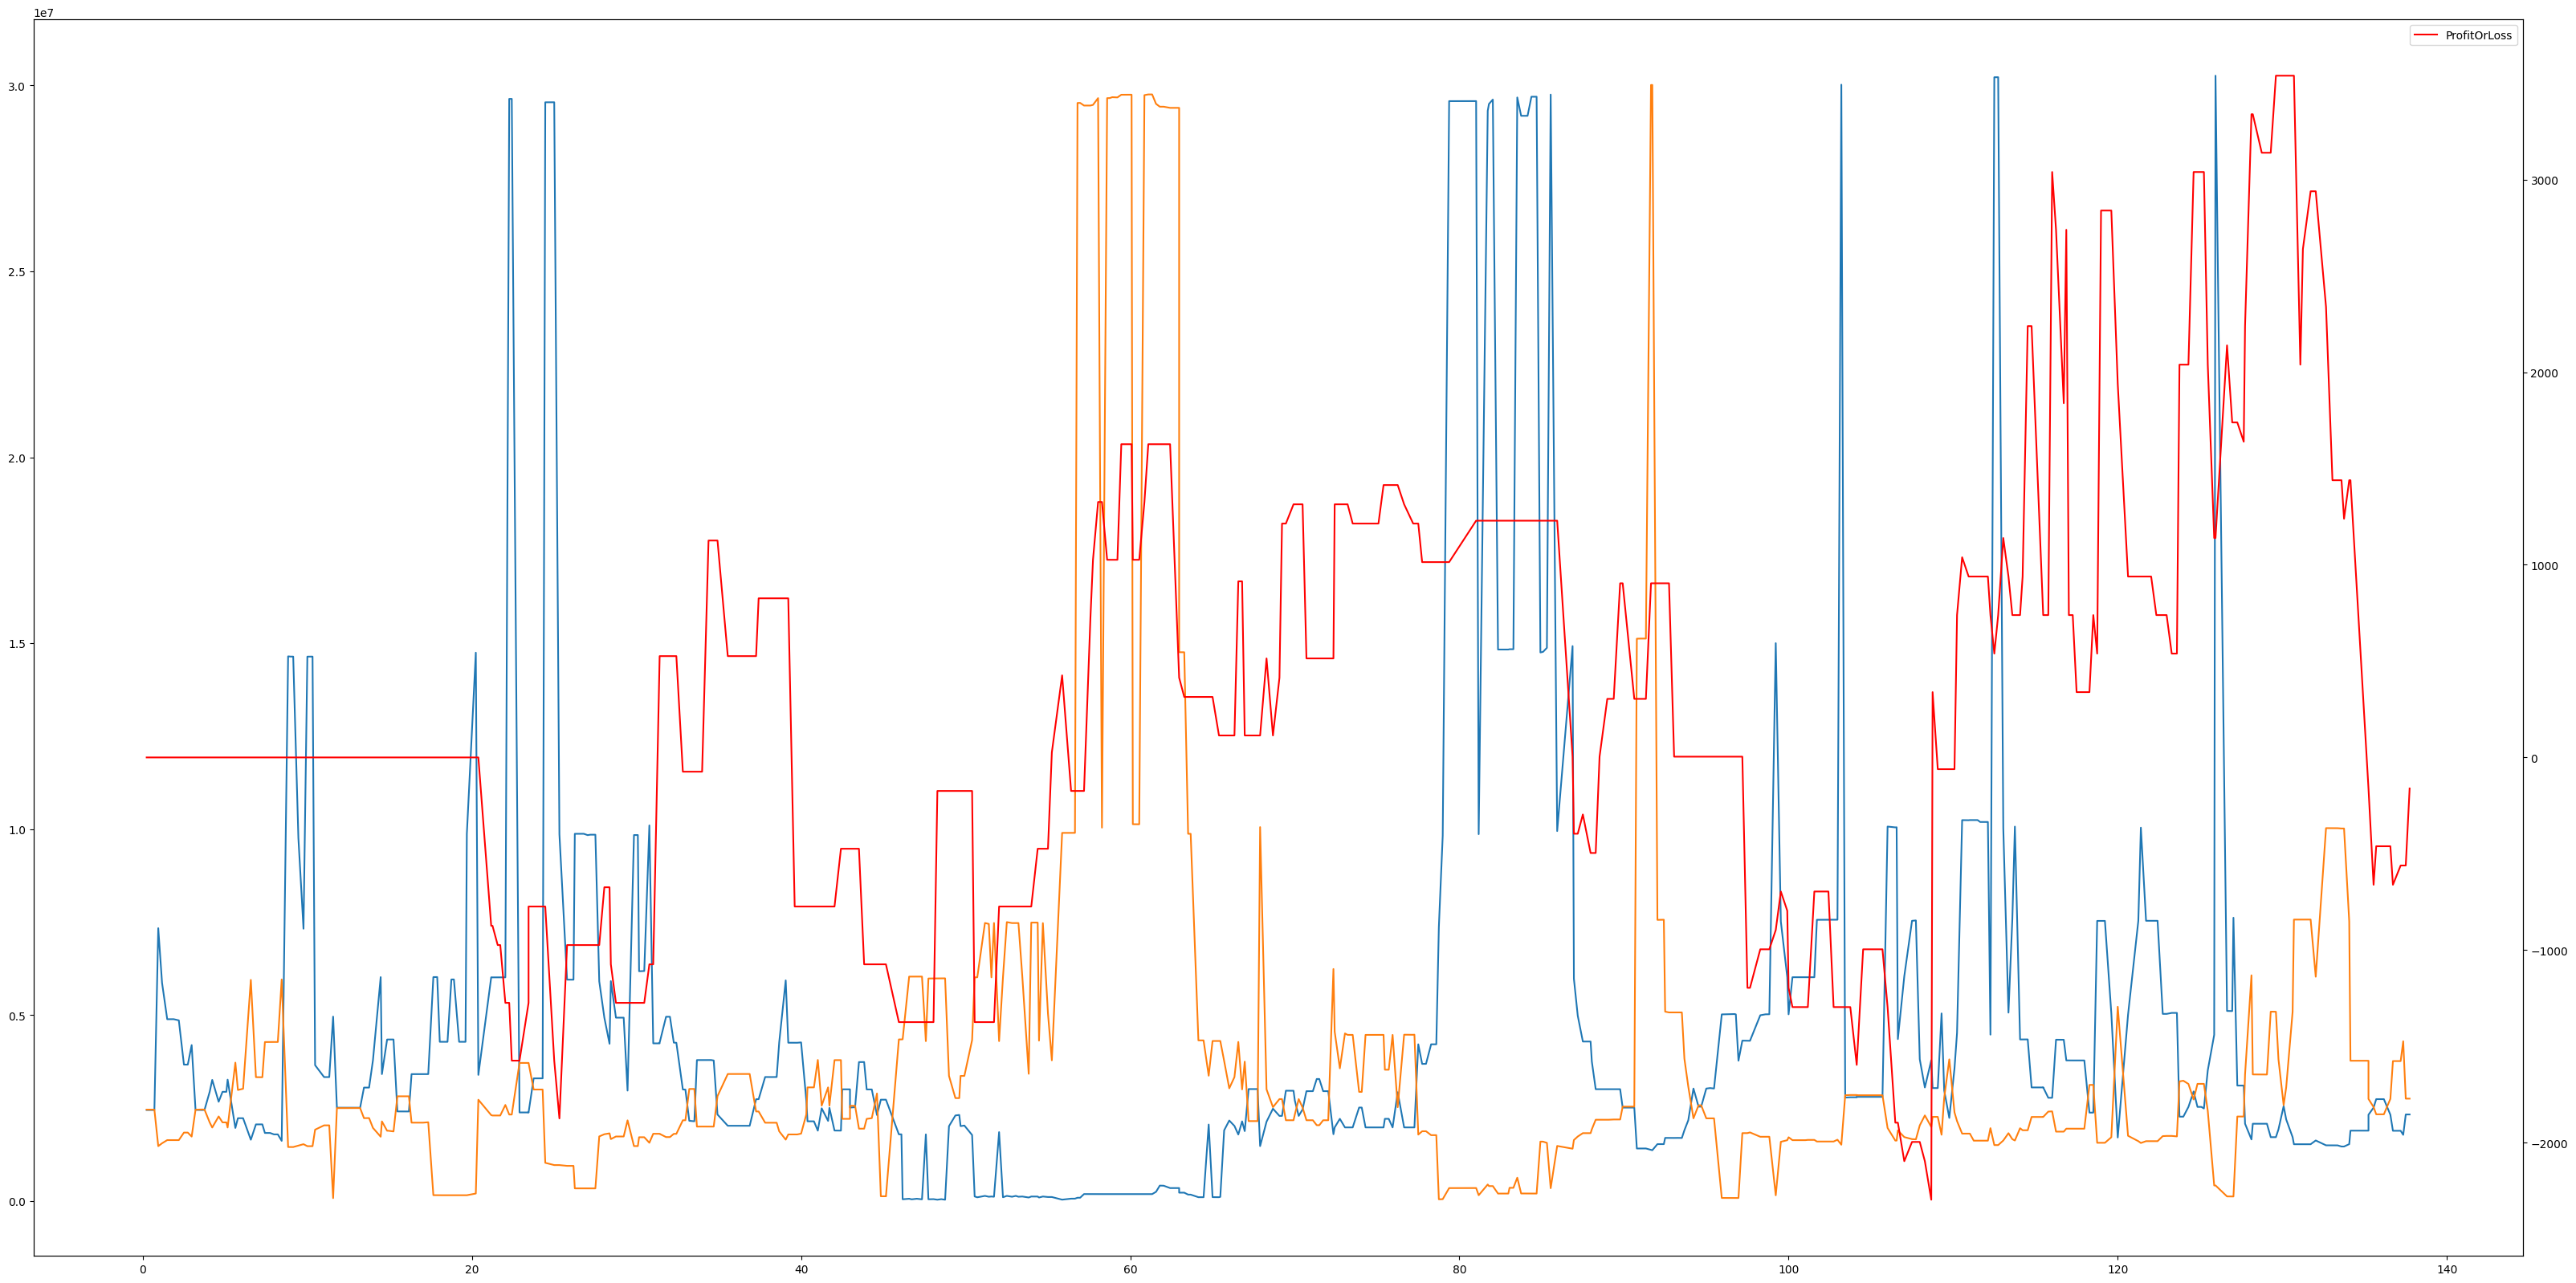

,bid_liquidity,ask_liquidity,avg_price
0,2.444997e+06,2.454997e+06,147000.0
1,2.444997e+06,2.454997e+06,147000.0
2,2.444997e+06,2.454997e+06,147000.0
3,2.444997e+06,2.454997e+06,147000.0
4,7.334999e+06,1.473729e+06,146800.0
...,...,...,...
637,1.740381e+06,5.080822e+06,150700.0
638,1.740381e+06,5.080822e+06,150700.0
639,1.980616e+06,3.860996e+06,150600.0
640,1.980616e+06,3.861183e+06,150600.0


In [6]:
liquidity = pd.read_csv('../output/liquidity.csv')
PL = pd.read_csv('../score_board.csv')
# drop first row of PL dataframe
PL = PL.drop(PL.index[0])
# add liquidity to PL dataframe``
PL['Bid Liquidity'] = liquidity['bid_liquidity']
PL['Ask Liquidity'] = liquidity['ask_liquidity']
# plot PL and Liquidity
plt.plot(PL['Time'], PL['Bid Liquidity'], label='Bid Liquidity')
plt.plot(PL['Time'], PL['Ask Liquidity'], label='Ask Liquidity')
ax2 = plt.twinx()
ax2.plot(PL['Time'], PL['ProfitOrLoss'], label='ProfitOrLoss', color='red')
# plt.plot(PL['Time'], PL['ProfitOrLoss'], label='ProfitOrLoss')
plt.legend()
# save plot
plt.savefig(PATH + 'liquidity.png')
plt.show()
liquidity

<AxesSubplot: >

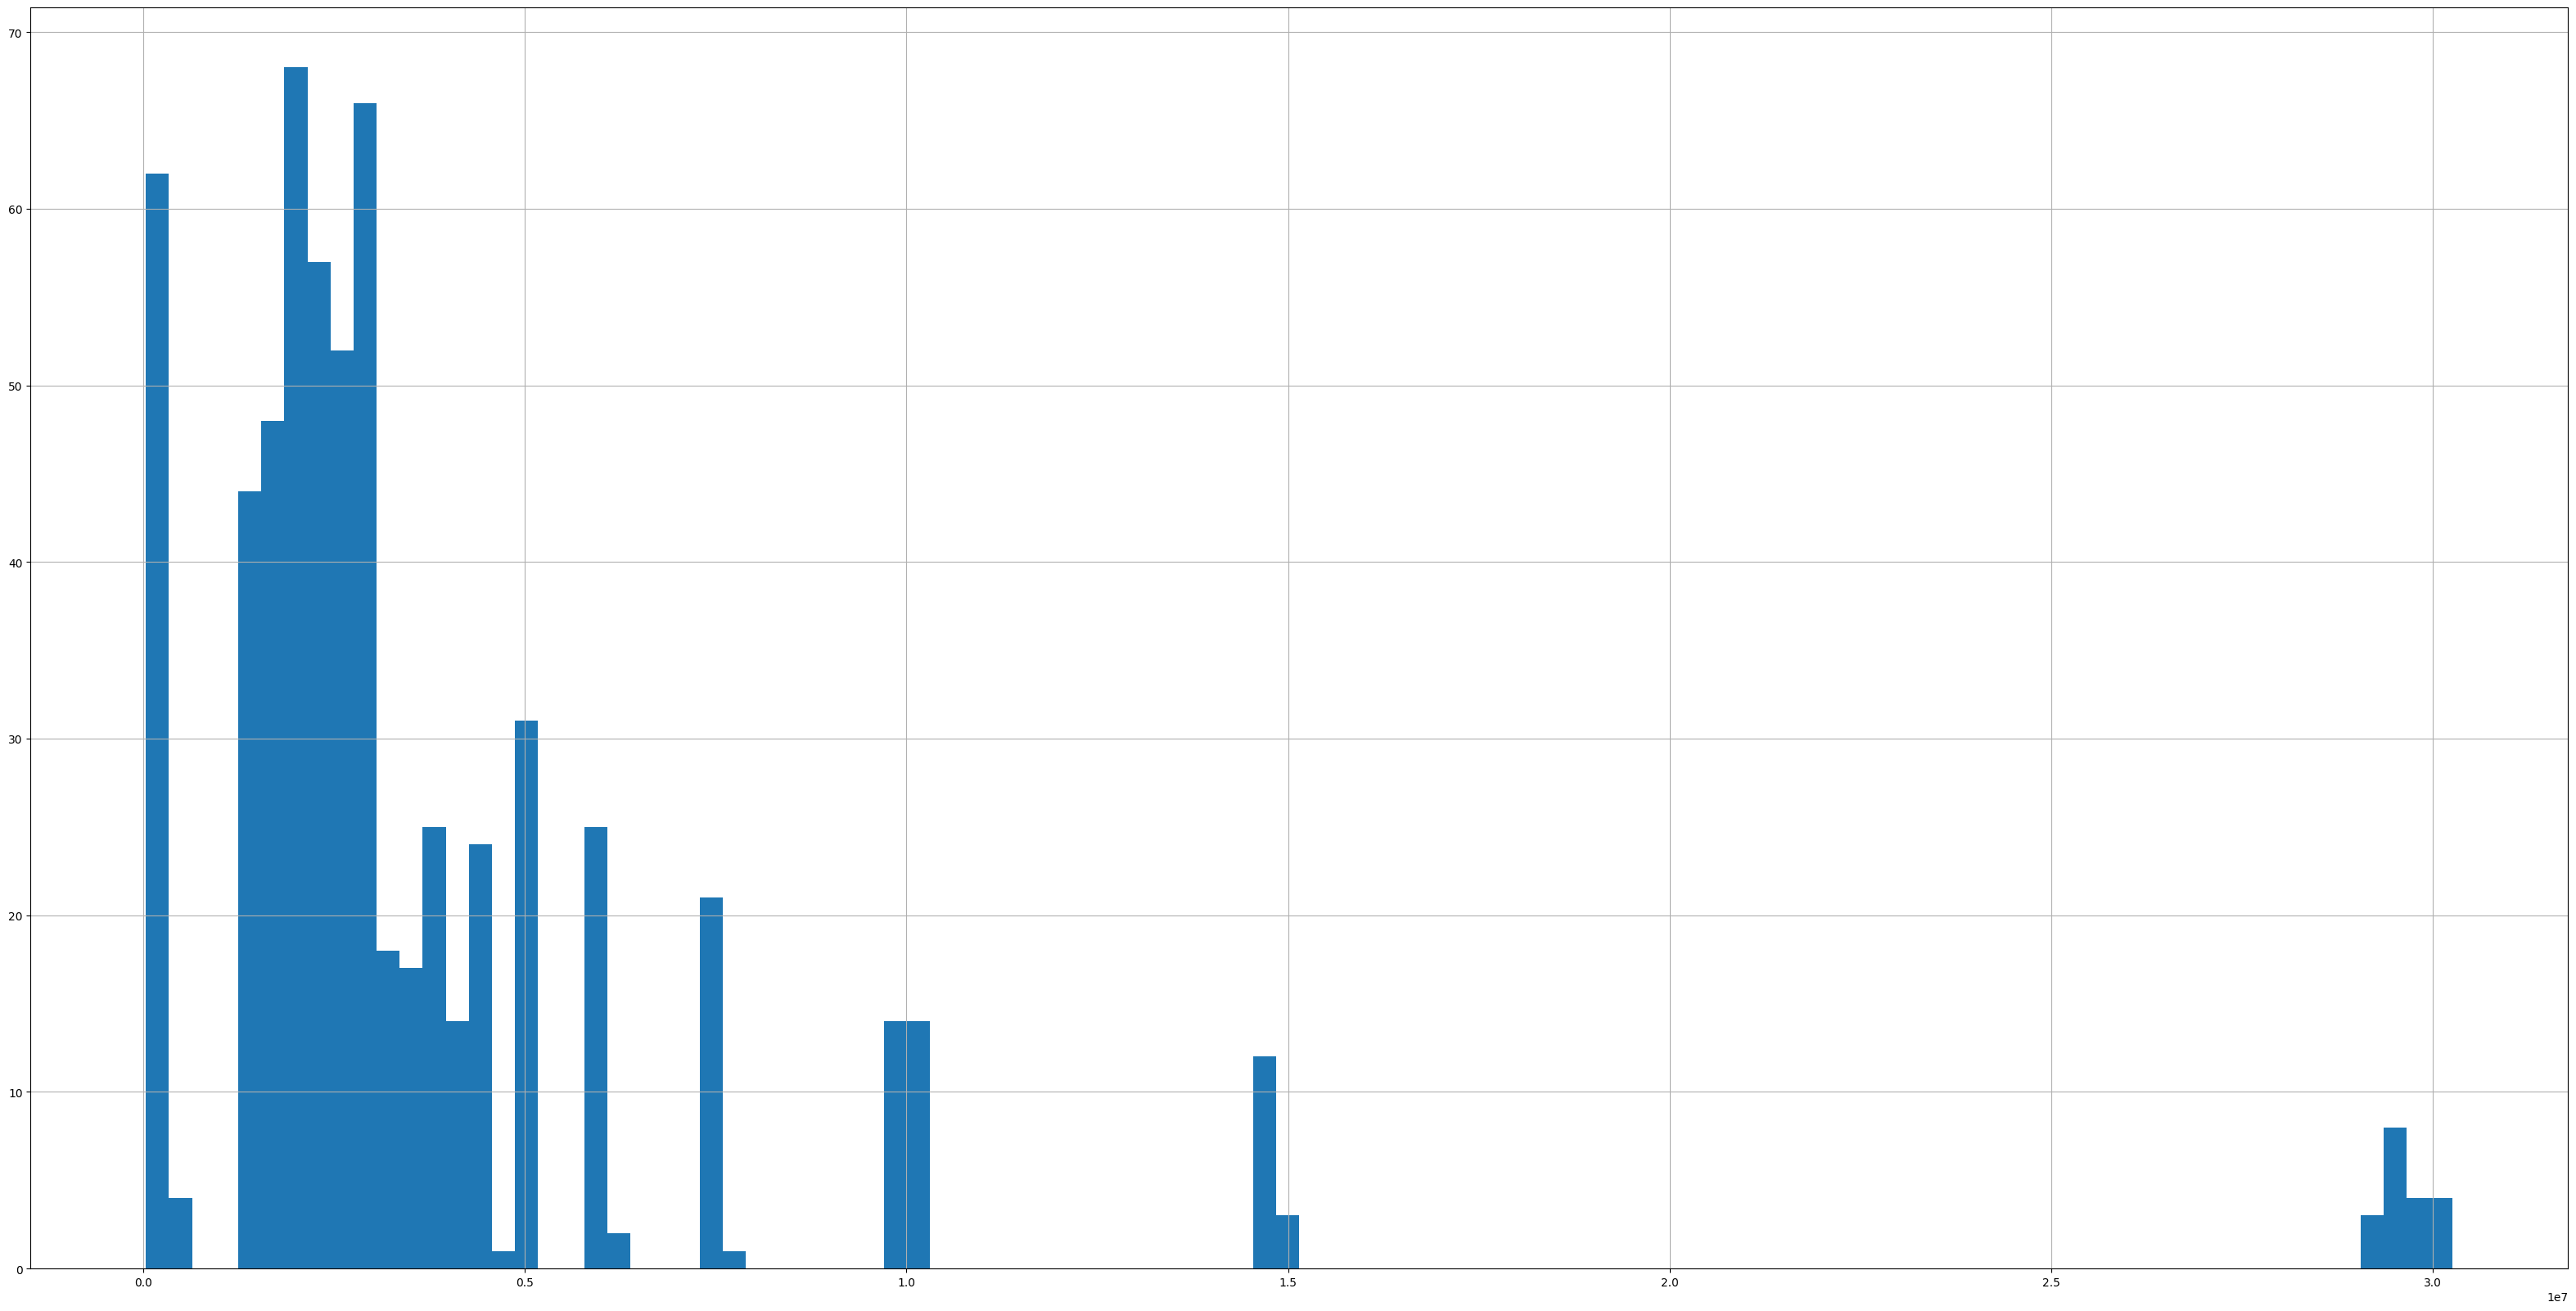

In [7]:
liquidity['bid_liquidity'].hist(bins=100)

In [9]:
# max liquidity
max(liquidity['liquidity']) / 100 * 3

915856.5510291425

(array([460., 119.,  33.,   5., 107., 269., 253., 290., 184., 202., 134.,
        122.,  34., 131.,  48.,  94.,  51.,   0.,  66., 116.,  13.,   2.,
          0.,  80.,  49.,   1.,   0.,   0.,   0.,   0.,   4.,  69.,  45.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  15.,  41.,  24.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,  10.,   5.,  20.,  25.,  27.,  25.,   0.,
          2.]),
 array([   45942.74577652,   365184.03156805,   684425.31735958,
         1003666.60315111,  1322907.88894264,  1642149.17473417,
         1961390.4605257 ,  2280631.74631722,  2599873.03210875,
         2919114.31790028,  3238355.60369181,  3557596.88948334,
         3876838.17527487,  4196079.4610664 ,  4515320.746

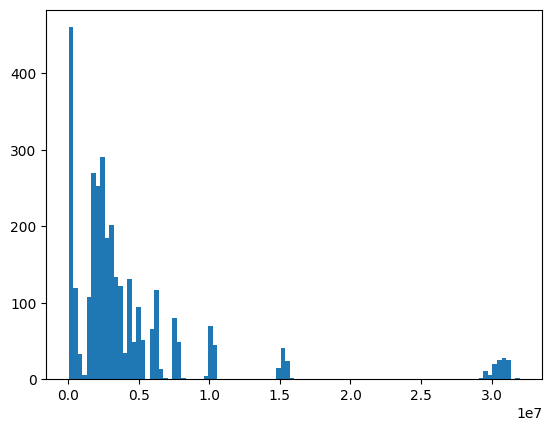

In [7]:
# plot distribution of liquidity
plt.hist(liquidity['ask_liquidity'], bins=100)

### Investigating volatility

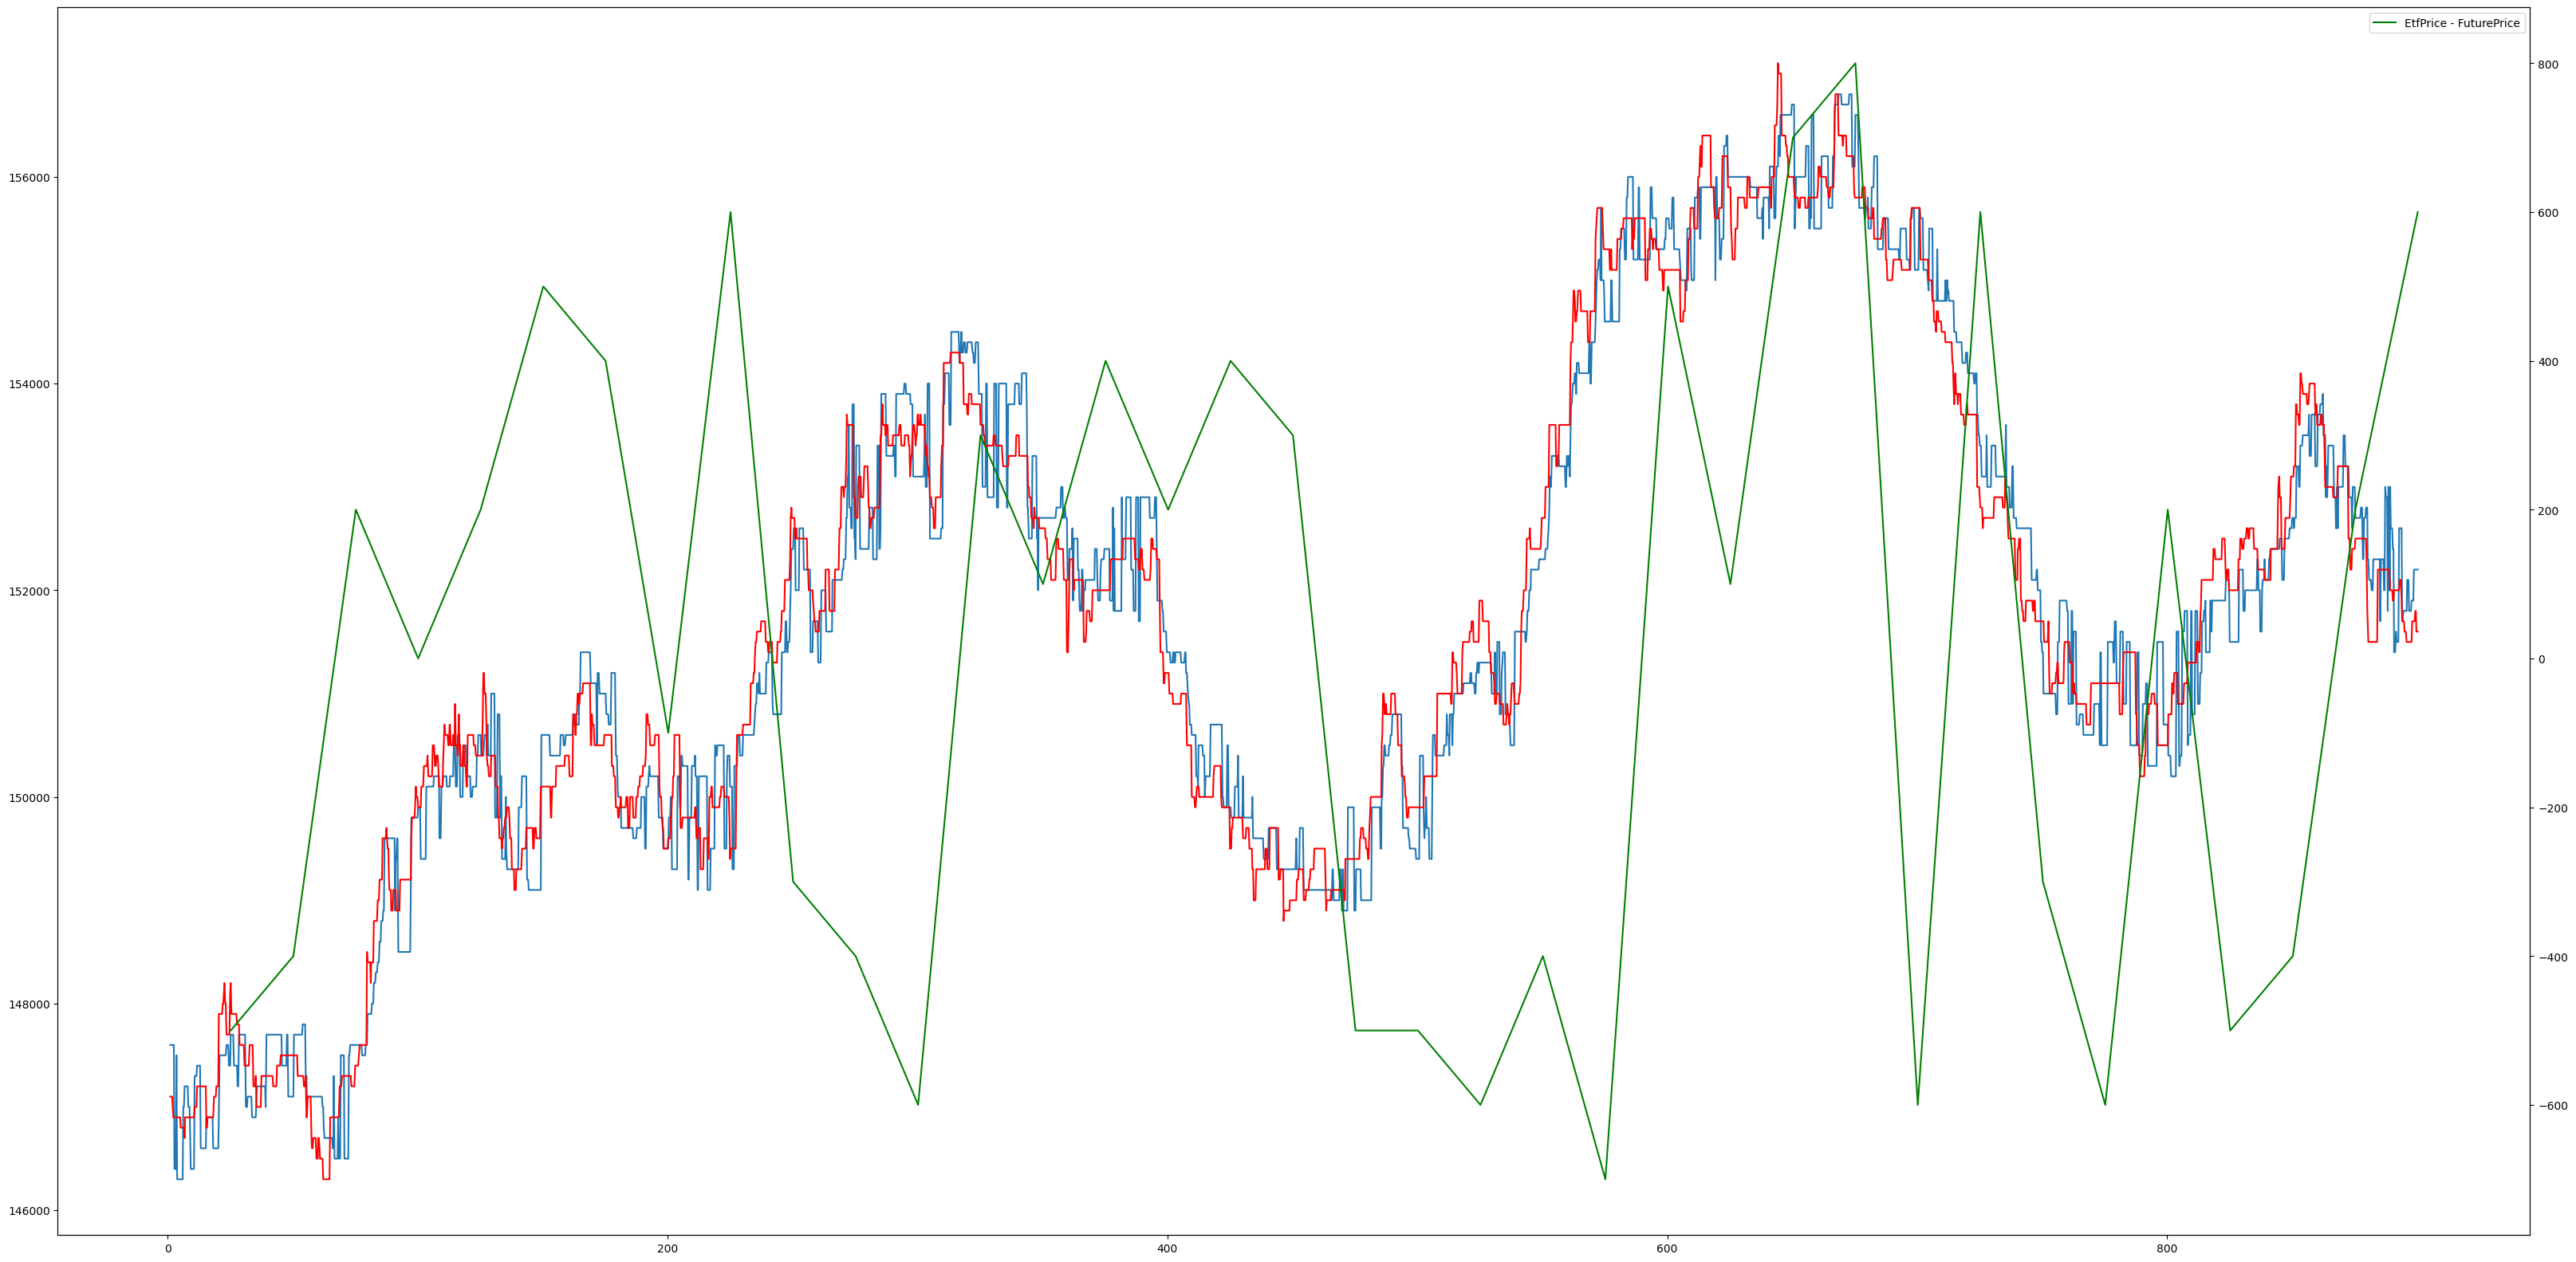

In [19]:
PL = pd.read_csv('../score_board.csv')
# drop first row of PL dataframe
PL = PL.drop(PL.index[0])
# plot EtfPrice and FuturePrice
plt.plot(PL['Time'], PL['EtfPrice'], label='EtfPrice')
plt.plot(PL['Time'], PL['FuturePrice'], label='FuturePrice', color='red')
# on a different axis plot the difference between EtfPrice and FuturePrice
ax2 = plt.twinx()
ax2.plot(PL['Time'][::100], PL['EtfPrice'][::100] - PL['FuturePrice'][::100], label='EtfPrice - FuturePrice', color='green')
# only plot every 100th row
plt.legend()
# increase the size of the plot
plt.rcParams["figure.figsize"] = (40,20)
plt.show()


### Market data

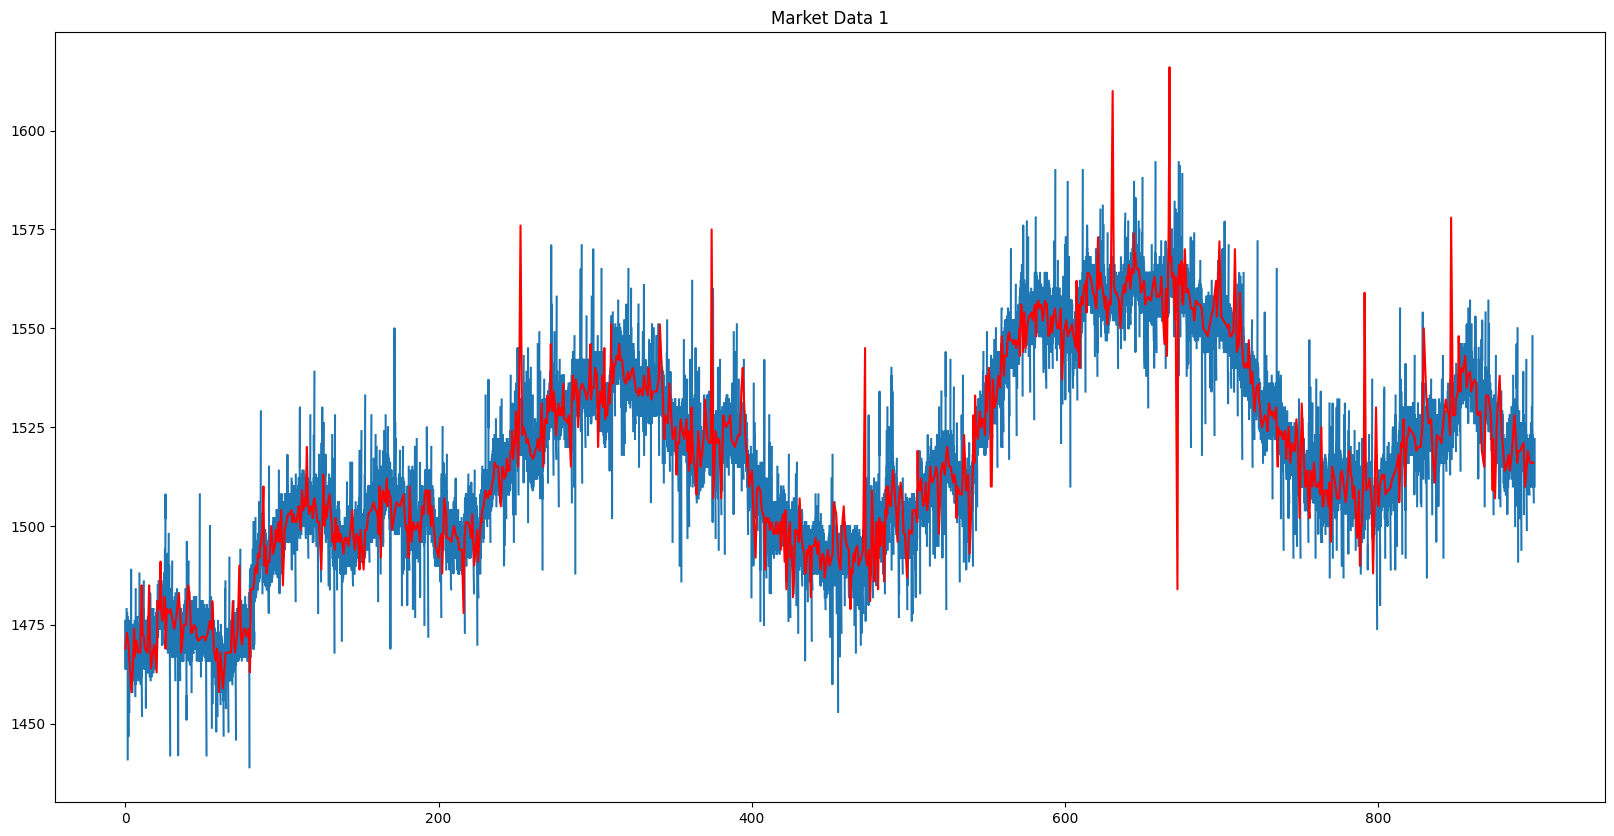

In [79]:
# import data from ./data/market_data.csv
df = pandas.read_csv('../data/market_data1.csv')

df_0 = df[df['Instrument'] == 0]
df_1 = df[df['Instrument'] == 1]
# exclude rows from df_0 where the absolute value of Price varies more than the standard deviation of df_0
df_0 = df_0[abs(df_0['Price'] - df_0['Price'].mean()) <= (df_0['Price'].std())]
df_0 = df_0[::200]
plt.title('Market Data 1')
plt.plot(df_1['Time'], df_1['Price'])
plt.plot(df_0['Time'], df_0['Price'], color='red')
plt.show()

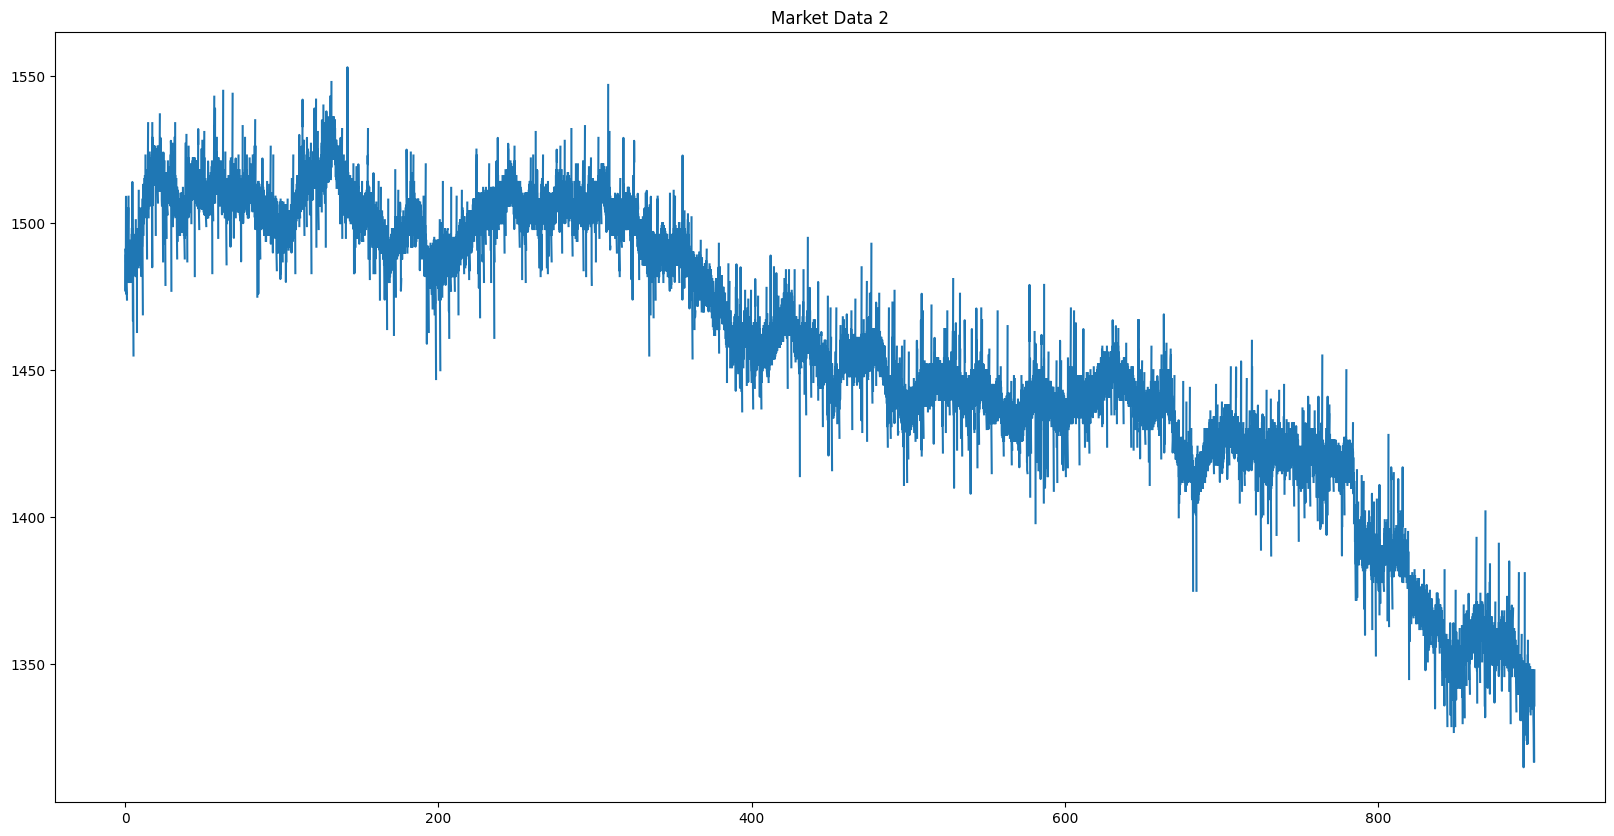

In [51]:
df = pandas.read_csv('../data/market_data2.csv')

df = df[df['Instrument'] == 1]
plt.title('Market Data 2')
plt.plot(df['Time'], df['Price'])
plt.show()

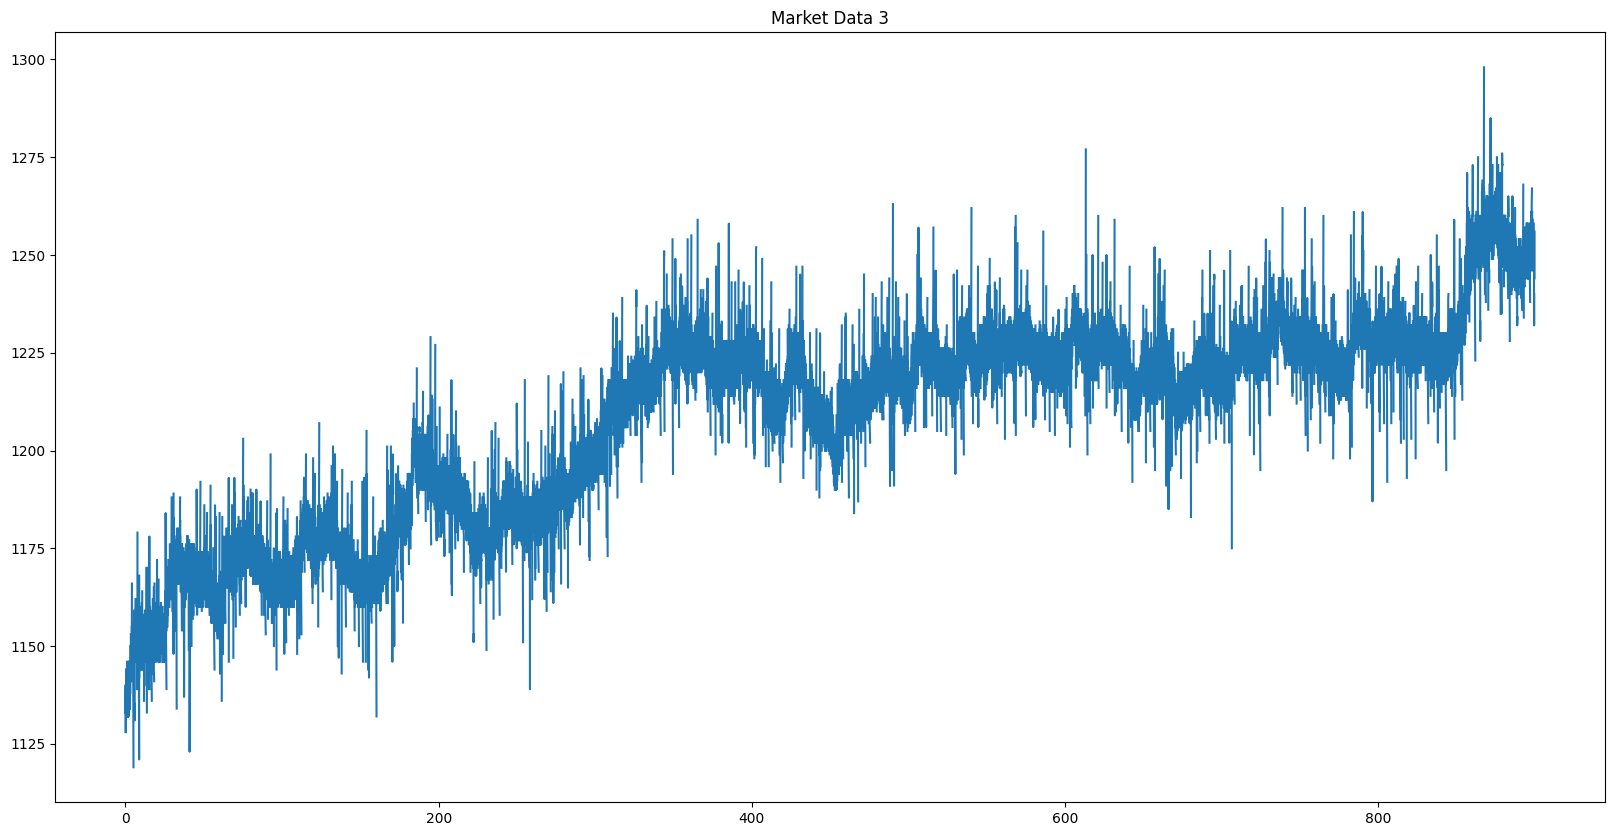

In [52]:
df = pandas.read_csv('../data/market_data3.csv')

df = df[df['Instrument'] == 1]
plt.title('Market Data 3')
plt.plot(df['Time'], df['Price'])
plt.show()

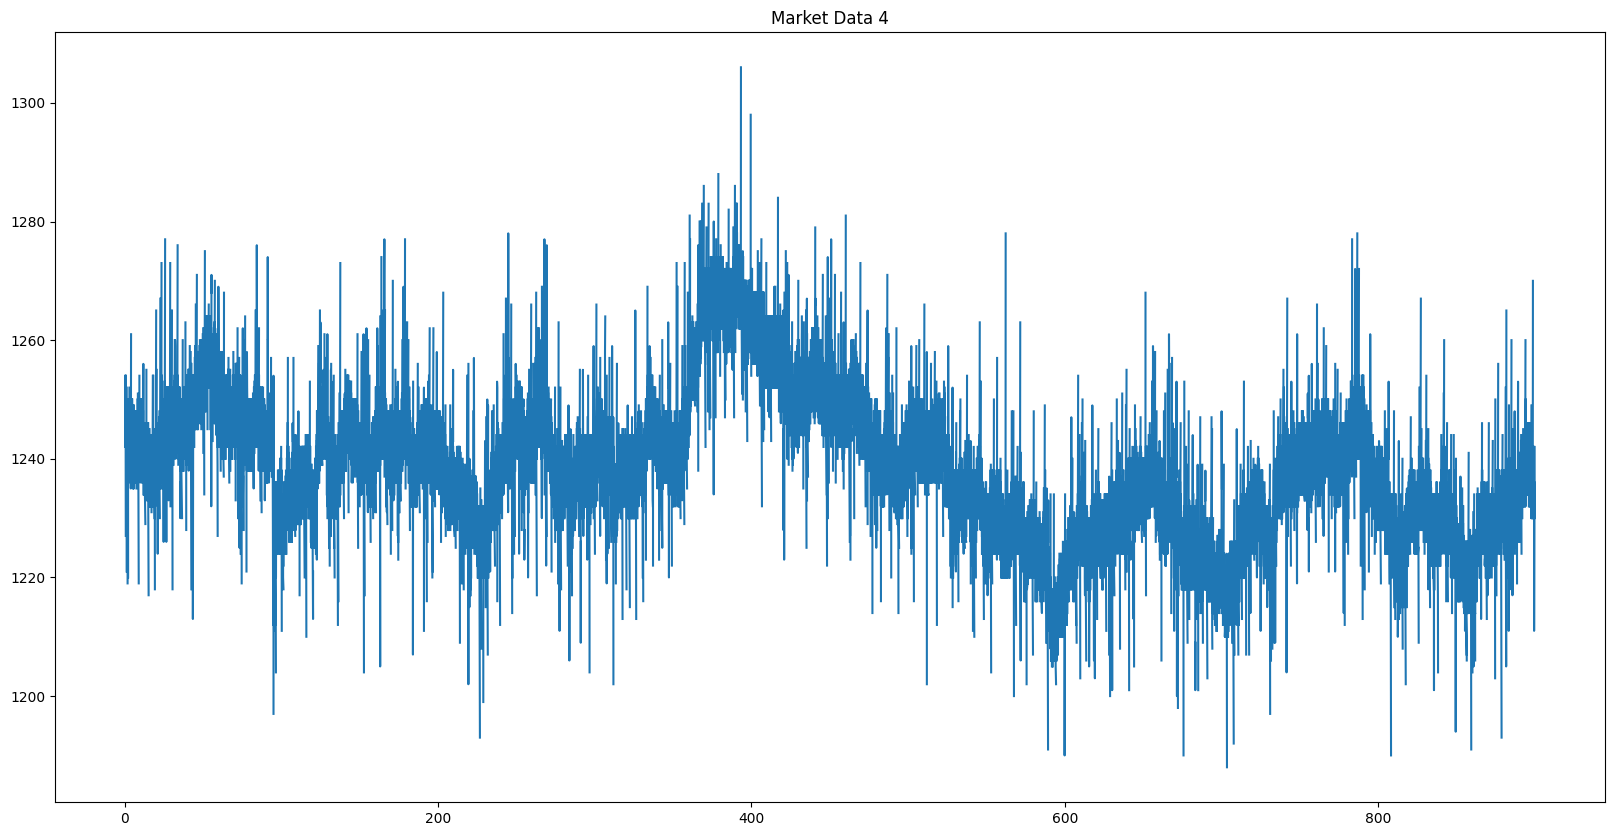

In [53]:
df = pandas.read_csv('../data/market_data4.csv')

df = df[df['Instrument'] == 1]
plt.title('Market Data 4')
plt.plot(df['Time'], df['Price'])
plt.show()

In [49]:
df_score_board = pandas.read_csv('../score_board.csv')
df_score_board.head(10)

,Time,Team,Operation,BuyVolume,SellVolume,EtfPosition,FuturePosition,EtfPrice,FuturePrice,TotalFees,AccountBalance,ProfitOrLoss,Status
0,0.000013,TraderOne,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
1,0.260121,TraderOne,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
2,0.533911,TraderOne,Tick,0,0,0,0,NaN,NaN,0,0,0,OK
3,0.784062,TraderOne,Tick,0,10,-10,0,147600.0,NaN,-147,1473147,1473147,OK
4,0.966399,TraderOne,Tick,0,10,-10,5,147600.0,NaN,-147,737647,737647,OK
5,1.223930,TraderOne,Tick,0,10,-10,5,147600.0,147100.0,-147,737647,147,OK
6,1.522750,TraderOne,Tick,0,10,-10,5,147600.0,147100.0,-147,737647,147,OK
7,1.741715,TraderOne,Tick,0,10,-10,5,147600.0,147100.0,-147,737647,147,OK
8,2.035359,TraderOne,Tick,0,10,-10,5,147600.0,147000.0,-147,737647,647,OK
9,2.217361,TraderOne,Tick,0,10,-10,5,147600.0,146900.0,-147,737647,1147,OK
